In [171]:
from six.moves import cPickle
import os
import matplotlib.pyplot as plt
import numpy as np
import importlib
import utils as ut
from tqdm import tqdm
import mlp as mlp

# Data Preprocessing

In [172]:
importlib.reload(ut)
X_train, y_train, Y_train = ut.loadData('data_batch_1', clipping=True)
X_val, y_val, Y_val = ut.loadData('data_batch_2', clipping=True)
X_test, y_test, Y_test = ut.loadData('test_batch', clipping=True)

data = ut.preprocess_data(X_train, y_train, Y_train, X_val, y_val, Y_val, X_test, y_test, Y_test)
data["X_train"].shape

(3072, 10000)

In [173]:
X_train_whole, y_train_whole, Y_train_whole = ut.loadData('data_batch_1', clipping=True)
X_test, y_test, Y_test = ut.loadData('test_batch', clipping=True)
for i in range(2,6):
    X, y, Y = ut.loadData('data_batch_'+str(i), clipping=True)
    X_train_whole = np.concatenate((X, X_train_whole), axis=1)
    y_train_whole = np.concatenate((y, y_train_whole))
    Y_train_whole = np.concatenate((Y, Y_train_whole), axis=1)
n_val = 5000

X_val, y_val, Y_val = X_train_whole[:,-n_val:], y_train_whole[-n_val:], Y_train_whole[:,-n_val:]
X_train, y_train, Y_train = X_train_whole[:,:-n_val], y_train_whole[:-n_val], Y_train_whole[:,:-n_val]

data_5000 = ut.preprocess_data(X_train, y_train, Y_train, X_val, y_val, Y_val, X_test, y_test, Y_test)
data_5000["X_train"].shape

(3072, 45000)

In [174]:
X_train_whole, y_train_whole, Y_train_whole = ut.loadData('data_batch_1', clipping=True)
X_test, y_test, Y_test = ut.loadData('test_batch', clipping=True)
for i in range(2,6):
    X, y, Y = ut.loadData('data_batch_'+str(i), clipping=True)
    X_train_whole = np.concatenate((X, X_train_whole), axis=1)
    y_train_whole = np.concatenate((y, y_train_whole))
    Y_train_whole = np.concatenate((Y, Y_train_whole), axis=1)
n_val = 1000

X_val, y_val, Y_val = X_train_whole[:,-n_val:], y_train_whole[-n_val:], Y_train_whole[:,-n_val:]
X_train, y_train, Y_train = X_train_whole[:,:-n_val], y_train_whole[:-n_val], Y_train_whole[:,:-n_val]

data_1000 = ut.preprocess_data(X_train, y_train, Y_train, X_val, y_val, Y_val, X_test, y_test, Y_test)
data_1000["X_train"].shape

(3072, 49000)

# Exercise 1: Upgrade Assignment 2 code to train & test k-layer networks
## Check functions step by step

In [183]:
importlib.reload(mlp)
net = mlp.MLP(init=mlp.Initialization.XAVIER)
bs = 20
X, Y = data['X_train'][:, :bs], data['Y_train'][:, :bs]
P = net.forward_pass(X)
P.shape

(10, 20)

In [137]:
# net.layers[0].b

In [182]:
importlib.reload(mlp)
net = mlp.MLP(init=mlp.Initialization.XAVIER)
bs = 20
X, Y = data['X_train'][:, :bs], data['Y_train'][:, :bs]
c = net.compute_cost(X, Y)
c

(2.6225131126746075, 2.6225131126746075)

In [152]:
importlib.reload(mlp)
net = mlp.MLP()
bs = 1
X, Y = data['X_train'][:, :bs], data['Y_train'][:, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)
net.update_parameters()

## Check gradients
### 2 Layers network

In [184]:
importlib.reload(mlp)
bs, d = 1, 20
net = mlp.MLP(dims=[d, 50, 10], init=mlp.Initialization.XAVIER, batch_norm=False)
X, Y = data['X_train'][:d, :bs], data['Y_train'][:d, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)
net.compare_gradients(X, Y, h=1e-5, eps=1e-6)

([6.842173318640139e-09, 2.486442854455087e-10],
 [1.6587616452790045e-10, 5.641024873722951e-11],
 [4.899544291336755e-12, 4.539913783449534e-12],
 [5.9559019782023934e-12, 9.097046727024605e-12])

### 3 Layers network

In [156]:
importlib.reload(mlp)
bs, d = 1, 10
net = mlp.MLP(k=3, dims=[d, 50, 50, 10])
X, Y = data['X_train'][:d, :bs], data['Y_train'][:d, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)
net.compare_gradients(X, Y, h=1e-5, eps=1e-6)

([2.3368991411420747e-10, 3.13794086334995e-11, 3.728708763838848e-08],
 [3.277285191419648e-11, 1.7059357153595256e-11, 4.537690730579009e-09],
 [1.6474903578086314e-11, 4.928498528733449e-12, 9.320475480139577e-12],
 [1.836612889549727e-11, 9.995704819409922e-12, 1.0905263736309123e-11])

### 4 Layers network

In [157]:
importlib.reload(mlp)
bs, d = 1, 10
net = mlp.MLP(k=4, dims=[d, 50, 50, 50, 10])
X, Y = data['X_train'][:d, :bs], data['Y_train'][:d, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)
net.compare_gradients(X, Y, h=1e-5, eps=1e-6)

([2.6438928162612805e-10,
  2.9486854785275063e-10,
  2.4176841116217406e-10,
  2.0206190851572843e-07],
 [8.1919244006615e-11,
  1.4913519714159913e-10,
  5.787743618143555e-11,
  3.0974302288633016e-07],
 [1.9154730080718497e-11,
  7.383307039214061e-12,
  5.159364314830063e-12,
  9.74895465206761e-12],
 [2.1066222863352912e-11,
  1.72418975798172e-11,
  1.0931937785563228e-11,
  1.722620132717165e-11])

### Different batch sizes and lamdas

In [181]:
batch_size = [1, 32, 64, 100]
lambdas = [0, 0.1, 1]

for l in lambdas:
    for bs in batch_size:
        X, Y = data['X_train'][:d, :bs], data['Y_train'][:d, :bs]
        net = mlp.MLP(dims=[d, 50, 10], lamda=l, init=mlp.Initialization.XAVIER, batch_norm=False)
        P = net.forward_pass(X)
        net.compute_gradients(X, Y, P)
        rerr_w, rerr_b, aerr_w, aerr_b = net.compare_gradients(X, Y, h=1e-5, eps=1e-6)
        print(f'Batch size: {bs} - Lambda {l}->\n relative_error on gWs {rerr_w} \n relative_error on gbs {rerr_b} \n absolute error on gWs {aerr_w} \n absolute error on gbs {aerr_b}   ')

Batch size: 1 - Lambda 0->
 relative_error on gWs [2.534100858988858e-10, 1.0982245617702531e-10] 
 relative_error on gbs [6.752789597524107e-11, 3.574998985584907e-11] 
 absolute error on gWs [3.3554197890789567e-12, 3.1799358667095047e-12] 
 absolute error on gbs [3.801446969708966e-12, 7.1245301325184585e-12]   
Batch size: 32 - Lambda 0->
 relative_error on gWs [2.113299441341759e-09, 8.981601123671104e-10] 
 relative_error on gbs [1.4739882352388053e-09, 1.8197502060383747e-10] 
 absolute error on gWs [1.095818874775553e-11, 1.1769664245053942e-11] 
 absolute error on gbs [1.2354949151152216e-11, 1.0315960585760565e-11]   
Batch size: 64 - Lambda 0->
 relative_error on gWs [1.7592318657131067e-09, 2.0407567549093274e-09] 
 relative_error on gbs [9.861834670471749e-10, 1.521921250419527e-10] 
 absolute error on gWs [1.1674283701258812e-11, 1.2017577492188581e-11] 
 absolute error on gbs [1.0090653840928373e-11, 1.0616754177183995e-11]   
Batch size: 100 - Lambda 0->
 relative_error

## Try to train the network with mini batch gd

In [163]:
importlib.reload(mlp)
net = mlp.MLP(lamda=0, init=mlp.Initialization.XAVIER)
data_100 = {"X_train": data["X_train"][:,:100], "y_train": data["y_train"][:100], "Y_train": data["Y_train"][:,:100], "X_val":data["X_val"][:,:100], "y_val": data["y_val"][:100], "Y_val": data["Y_val"][:,:100]}
GDparams = {"n_batch":100, "n_epochs":200, "eta":1e-3, "exp":"test_grad"}
net.mini_batch_gd(data_100, GDparams, verbose=True, backup=True)

 | train_loss=1.6814181158523251 | val_loss=2.3418572632798287 | train_cost=1.6814181158523251 | val_cost=2.3418572632798287
 44%|████▍     | 89/200 [00:03<00:04, 26.61it/s]Epoch 83: train_acc=0.55 | val_acc=0.11 | train_loss=1.6754708866561137 | val_loss=2.341424768906559 | train_cost=1.6754708866561137 | val_cost=2.341424768906559
Epoch 84: train_acc=0.56 | val_acc=0.11 | train_loss=1.6695753636044282 | val_loss=2.3410634732754643 | train_cost=1.6695753636044282 | val_cost=2.3410634732754643
Epoch 85: train_acc=0.56 | val_acc=0.11 | train_loss=1.6637405929035536 | val_loss=2.3406739369301808 | train_cost=1.6637405929035536 | val_cost=2.3406739369301808
Epoch 86: train_acc=0.56 | val_acc=0.11 | train_loss=1.6578588482329395 | val_loss=2.3403827798223755 | train_cost=1.6578588482329395 | val_cost=2.3403827798223755
Epoch 87: train_acc=0.58 | val_acc=0.11 | train_loss=1.6520166560966851 | val_loss=2.339872211401996 | train_cost=1.6520166560966851 | val_cost=2.339872211401996
Epoch 88: t

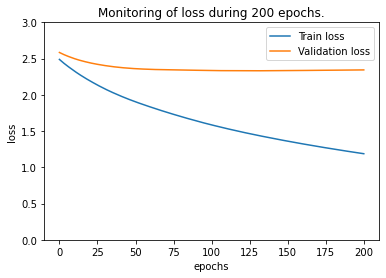

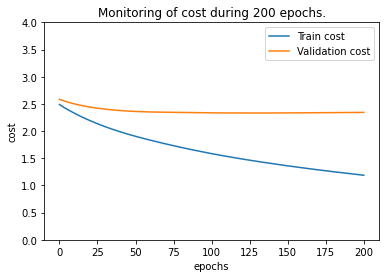

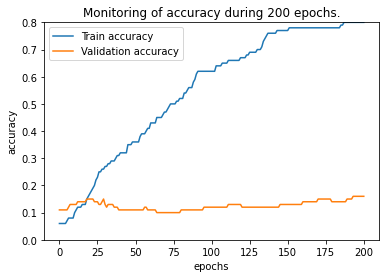

In [164]:
net.plot_metric(GDparams, metric="loss", cyclic=False)
net.plot_metric(GDparams, metric="cost", cyclic=False)
net.plot_metric(GDparams, metric="accuracy", cyclic=False)

# Exercise 2: Can I train multi-layer networks?
## Replicate results of assignement 2 Figure 3

In [165]:
importlib.reload(mlp)
net = mlp.MLP(lamda=.01, batch_norm=False, init=mlp.Initialization.XAVIER, seed=42)
GDparams = {"n_cycles":1, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":500, "freq":10, "exp":"rep3"}
net.cyclic_learning(data, GDparams, verbose=True, backup=True)

100%|██████████| 10/10 [00:42<00:00,  4.21s/it]


In [54]:
net.layers[0].activation

<function mlp.relu(x)>

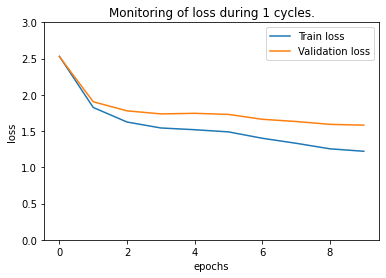

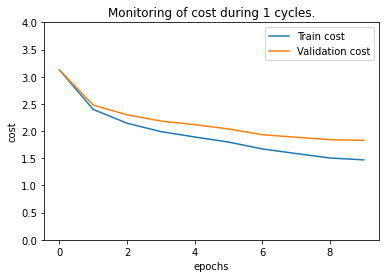

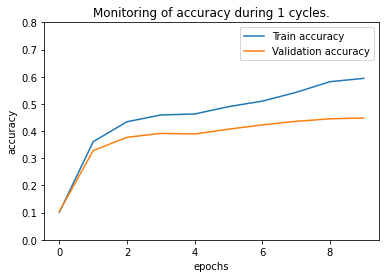

In [166]:
importlib.reload(mlp)
GDparams = {"n_cycles":1, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":500, "freq":10, "exp":"rep3"}
net = mlp.MLP.load_mlp(GDparams, lamda=0.01)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy")

In [167]:
net.compute_accuracy(data["X_test"], data["y_test"])

0.457

## Replicate results of assignement 2 Figure 4

In [176]:
importlib.reload(mlp)
net2 = mlp.MLP(lamda=.01)
GDparams = {"n_batch":100, "n_cycles":3, "eta_min":1e-5, "eta_max":1e-1, "ns":800, "freq":9, "exp":"rep4"}
net2.cyclic_learning(data, GDparams, verbose=True, backup=True)

 33%|███▎      | 16/48 [00:50<01:44,  3.28s/it]Update Step 1593: train_acc=0.6599 | val_acc=0.4611 | train_loss=1.068471025103875 | val_loss=1.5623130305173636 | train_cost=1.399806601021004 | val_cost=1.8936486064344926
Update Step 0: train_acc=0.6595 | val_acc=0.4609 | train_loss=1.0682371398720092 | val_loss=1.5619352956176382 | train_cost=1.3995600522641616 | val_cost=1.8932582080097906
 67%|██████▋   | 32/48 [01:34<00:48,  3.05s/it]Update Step 1593: train_acc=0.6983 | val_acc=0.4655 | train_loss=0.9801288898284376 | val_loss=1.5479914819723695 | train_cost=1.27835887817574 | val_cost=1.8462214703196718
Update Step 0: train_acc=0.6985 | val_acc=0.4651 | train_loss=0.9798853721914816 | val_loss=1.5477016969544797 | train_cost=1.2781204601006373 | val_cost=1.8459367848636354
100%|██████████| 48/48 [02:18<00:00,  2.89s/it]Update Step 1593: train_acc=0.7136 | val_acc=0.4673 | train_loss=0.9421352099004505 | val_loss=1.5376547263032736 | train_cost=1.2545125252739078 | val_cost=1.850032

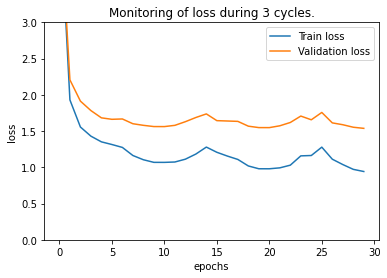

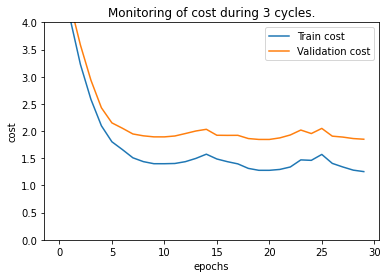

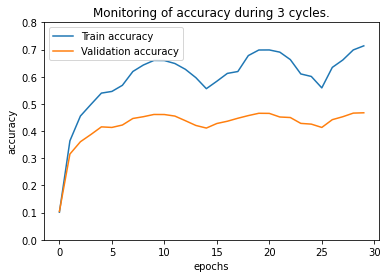

In [185]:
importlib.reload(mlp)
GDparams = {"n_batch":100, "n_cycles":3, "eta_min":1e-5, "eta_max":1e-1, "ns":800, "freq":9, "exp":"rep4"}
net2 = mlp.MLP.load_mlp(GDparams, lamda=0.01)
net2.plot_metric(GDparams, metric="loss")
net2.plot_metric(GDparams, metric="cost")
net2.plot_metric(GDparams, metric="accuracy")

In [186]:
net2.compute_accuracy(data['X_test'], data['y_test'])

0.4758

## Train a 3-layers network

In [168]:
importlib.reload(mlp)
net = mlp.MLP(lamda=.005, k=3, dims=[3072,50,50,10])
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"lay3"}
net.cyclic_learning(data_5000, GDparams, verbose=True, backup=True)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy")

 95%|█████████▌| 19/20 [04:44<00:14, 14.96s/it]


KeyboardInterrupt: 

In [ ]:
importlib.reload(mlp)
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"lay3"}
net = mlp.MLP.load_mlp(GDparams, lamda=.005, k=3, dims=[3072,50,50,10])
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy")

In [43]:
net.compute_accuracy(data_5000["X_test"], data_5000["y_test"])

0.5335

## Train a 9-layers network

100%|██████████| 20/20 [05:37<00:00, 16.87s/it]


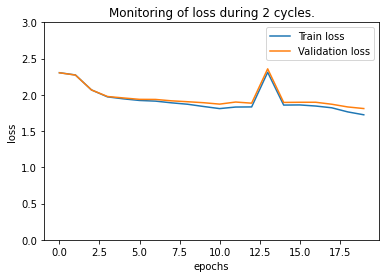

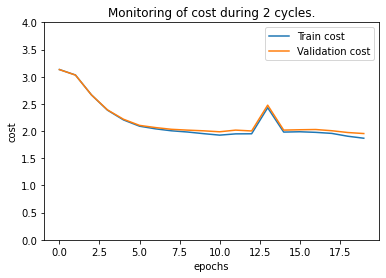

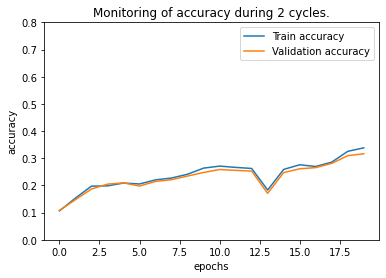

In [47]:
importlib.reload(mlp)
net = mlp.MLP(lamda=.005, k=9, dims=[3072, 50, 30, 20, 20, 10, 10, 10, 10,10])
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"lay9"}
net.cyclic_learning(data_5000, GDparams, verbose=True, backup=True)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy")

In [48]:
net.compute_accuracy(data_5000["X_test"], data_5000["y_test"])

0.3289

# Exercise 3: Implement batch normalization
## Check functions step by step

In [140]:
importlib.reload(mlp)
net = mlp.MLP(k=3, dims=[3072, 50, 50, 10], batch_norm=True)
bs = 20
X, Y = X_train[:, :bs], Y_train[:, :bs]
P = net.forward_pass(X, train_mode=True)
P.shape

(10, 20)

In [141]:
net.layers

In [148]:
importlib.reload(mlp)
net = mlp.MLP(k=3, dims=[3072, 50, 50, 10], batch_norm=True)
bs = 20
X, Y = X_train[:, :bs], Y_train[:, :bs]
c = net.compute_cost(X, Y, train_mode=True)
c

(3.1550427717314147, 3.1550427717314147)

In [152]:
importlib.reload(mlp)
net = mlp.MLP(k=3, dims=[3072, 50, 50, 10], batch_norm=True)
bs = 1
X, Y = X_train[:, :bs], Y_train[:, :bs]
P = net.forward_pass(X)
net.compute_gradients_bn(X, Y, P)
net.update_parameters()

## Check the gradients